This notebook shows how to get the contours of an image

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

%matplotlib inline

## Preprocess the image

Load the image

In [2]:
img = cv.cvtColor(cv.imread('images/captcha.png'), cv.COLOR_RGB2GRAY)
original_img = img

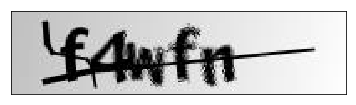

In [3]:
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]);

Invert the image

In [4]:
img = 255 - img

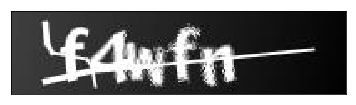

In [5]:
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]);

Apply thresholding

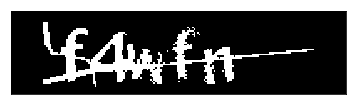

In [6]:
ret, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]);

Now we apply a morphological transformation to remove some noise

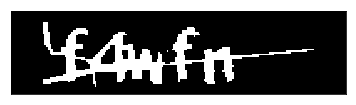

In [7]:
kernel = np.ones([3,3])
img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]);

## Find contours

In [8]:
contours, hierachy = cv.findContours(img, cv.RETR_TREE,  cv.CHAIN_APPROX_SIMPLE)

In [9]:
image_with_contours = cv.drawContours(cv.cvtColor(original_img, cv.COLOR_GRAY2BGR), contours, -1, (0,255,0), 1)

We draw all the contours onto the original image

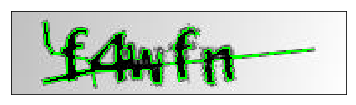

In [10]:
plt.imshow(cv.cvtColor(image_with_contours, cv.COLOR_BGR2RGB)), plt.xticks([]), plt.yticks([]);

In [11]:
print('Number of contours extracted: {}'.format(len(contours)))

Number of contours extracted: 5


We draw each contour on the original image

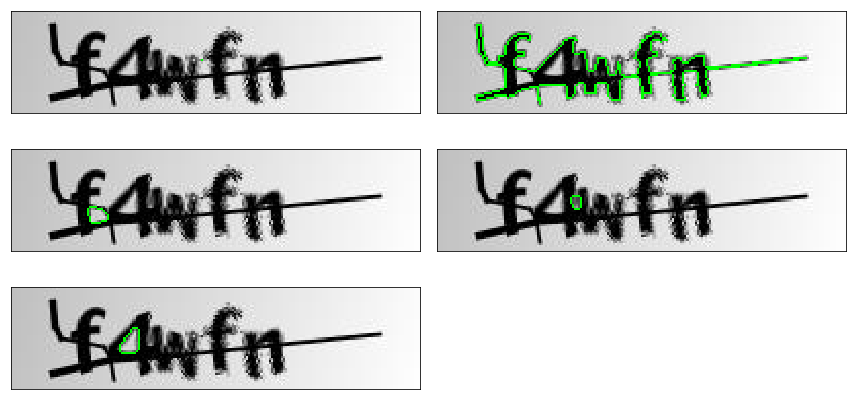

In [12]:
n = len(contours)
if n % 2 == 0:
    rows = n // 2
else:
    rows = (n // 2) + 1
fig, ax = plt.subplots(rows, 2, figsize=(12, 2*rows))

for i, j in product(range(0, rows), [0, 1]):
    if i * 2 + j >= len(contours):
        continue
    plt.sca(ax[i, j])
    plt.xticks([])
    plt.yticks([])
    result = cv.drawContours(cv.cvtColor(original_img, cv.COLOR_GRAY2BGR), contours, i*2+j, (0,255,0), 1)
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    
if n % 2 == 1:
    ax[rows-1,1].set_visible(False)
plt.tight_layout()